# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations. 

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics. 

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [4]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [1]:
# To filter the warnings
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split


# To build linear model for statistical analysis and prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

# To get diferent metric scores
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix, roc_auc_score

# codes for decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# this will help in making the Python code more structured automatically (good coding practice)
!pip install nb_black
%load_ext nb_black

<IPython.core.display.Javascript object>

## Data Overview

- Observations
- Sanity checks

In [2]:
data = pd.read_csv("INNHotelsGroup.csv") #upload data

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


<IPython.core.display.Javascript object>

In [4]:
# checking the shape of the data
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")  # f-string

There are 36275 rows and 19 columns.


<IPython.core.display.Javascript object>

### Data Observations:
*

In [5]:
# to view a sample of the data and to set the ramdom_state so we will see the same samples
# every time running this code
data.sample(10, random_state=1)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
30392,INN30393,1,0,1,0,Not Selected,0,Room_Type 1,53,2018,9,11,Online,0,0,0,94.32,0,Not_Canceled
6685,INN06686,2,0,1,2,Meal Plan 1,0,Room_Type 1,63,2018,4,22,Online,0,0,0,105.30,1,Canceled
8369,INN08370,2,0,2,3,Meal Plan 1,0,Room_Type 4,55,2018,9,11,Online,0,0,0,106.24,0,Not_Canceled
2055,INN02056,2,0,0,2,Not Selected,0,Room_Type 1,53,2017,12,29,Online,0,0,0,81.00,1,Not_Canceled
10969,INN10970,1,0,2,4,Meal Plan 1,0,Room_Type 1,245,2018,7,6,Offline,0,0,0,110.00,0,Canceled
24881,INN24882,2,0,3,7,Meal Plan 1,0,Room_Type 2,231,2018,8,1,Online,0,0,0,81.82,2,Canceled
28658,INN28659,2,0,0,3,Meal Plan 2,0,Room_Type 1,71,2018,5,10,Offline,0,0,0,126.00,1,Not_Canceled
20853,INN20854,2,0,1,2,Meal Plan 1,0,Room_Type 1,66,2017,10,9,Offline,0,0,0,75.00,0,Canceled
8501,INN08502,2,0,0,3,Meal Plan 1,0,Room_Type 2,40,2018,1,14,Online,0,0,0,77.55,1,Not_Canceled
1942,INN01943,2,0,0,2,Meal Plan 1,0,Room_Type 1,63,2018,8,9,Online,0,0,0,144.90,2,Not_Canceled


<IPython.core.display.Javascript object>

In [6]:
df = data.copy()  # copy data to df so we the original will be the same
# to check for any duplicate values in the data
print(
    f"There is/are {df.duplicated().sum()} duplication value(s) in the data."
)  # f-string

There is/are 0 duplication value(s) in the data.


<IPython.core.display.Javascript object>

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

<IPython.core.display.Javascript object>

In [9]:
# to check for missing values
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

<IPython.core.display.Javascript object>

### Data Observations:

* There are 36275 rows 19 columns.
* There is no missing value.
* There are 4 classification features as object dtype: Booking_ID, type_of_meal_plan, room_type_resevred, market_segment_type, and booking_status
* There are 15 numerical features, 14 of int64 dtype and 1 of float64 dtype
* Decided to drop Booking_ID column because it is the least important feature to predict if customers would keep or cancel thier reservation.

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


<IPython.core.display.Javascript object>

### Statistical Summary 

* There is at least one booking that has no adults in it. Majority of bookings, there are 2 adults. Max is 4 adults.
* The max of children in the bookings is 10.
* The purposes of booking are not family focus 
* Mean of booking a room for weekends is a slightly less than 1 days nd max at 7 days.
* Mean of booking a room for weekdays is a slightly more than 2 days and max at 17 days.
* The mean of lead_time from booking to arrival date is a slightly over 85 days. The least amount of lead_time is on the booking day and the maximum is 443 days. Does booking hotel rooms far in advance effect customers to follow through with their reservation? 
* We should take look if lead_time has effected customers to cancel their bookings.
* Most of bookings are during the weekdays. It's possible that customers' purposes to stay at the hotel are for work.
* Very few customers requested for parking. Assuming that customers do not have cars. This support the assumption that customers stay at the hotel during their work trips.
* The data suggestes that majority of bookings are for the stay in 2018. 
* The mean of arrival_month is 7.42365 and it indicates that there are more bookings from July to December that January to June.
* The mean of arrival_date is durning mid-month.
* There were a few repeated guests
* Most of customers have not cancelled their booking before. 
* However, The maximum of number of pervious bookings that has been canceled is 13 times. At least one customer canceled his/her booking 13 times in the past.
* The maximum of number of pervious bookings that has not been canceled is 58 times. At least one customer kept his/her booking 58 times in the past.
* The mean of avg_price_per_room per a booking is 103.42 dollars while the minimum price is 0 dollars(assuming a complementary booking) and maximum price is 540 dollars.(Does the booking for the stay during a peak season or the booking was made on the day.)
* A large number of bookings do not have special requests while the maximum is 5 requests. Do customers who have special requests keep thier bookings because it's inconvenient to make requests again for the new booking?

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [8]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [10]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

## Univariate Analysis

### Average Price Per Room

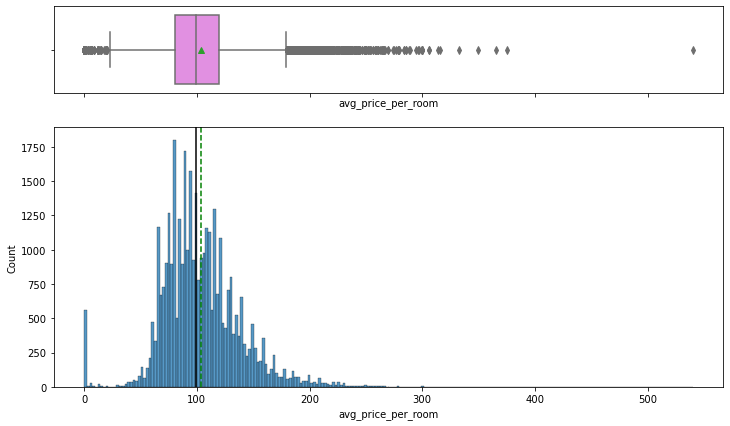

<IPython.core.display.Javascript object>

In [26]:
histogram_boxplot(data, "avg_price_per_room")

* The distribution of average price per room is right-skewed with the range from 0 to over 500 dollars.
* It has lots of outliers.
* Mean and Median are very close, around 100 dollars.
* Without outliners, this distribution is similar to a normal distribution.
* There are more than 500 booking counts that 0 dollars.
* What to do with outliers?

### Lead Time

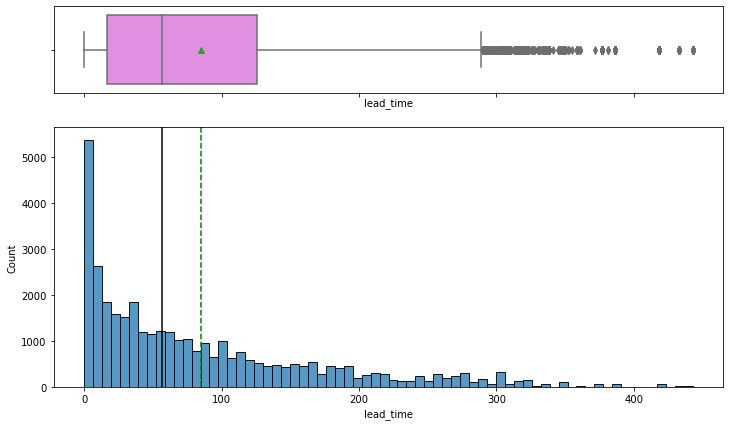

<IPython.core.display.Javascript object>

In [13]:
histogram_boxplot(data, "lead_time")  # mean=green, median=black

* The lead time contribution is heavily right-skewed. 
* There are a lot of outliers.
* More than 5000 booking counts were made on the day of or a few days before an arrival date.
* Very small number of bookings has a lead time between 200 day to over 400 days.
* The most distribution is between 0 day to 100 days.
* The mean (around 85 days) is smaller than the median (around 90 days). 

### Number of Previous Cancellations

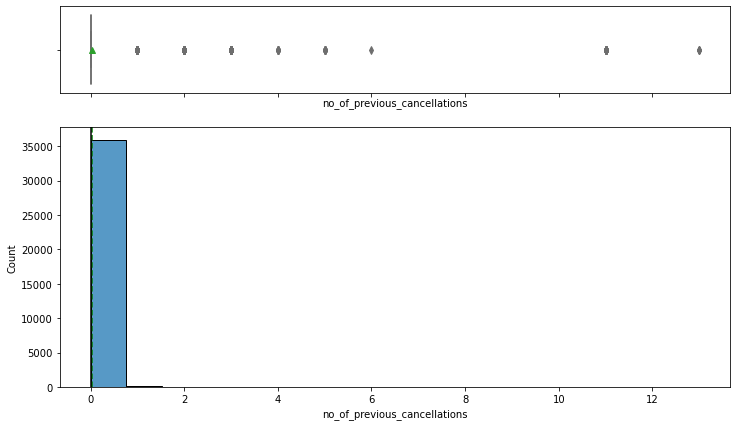

<IPython.core.display.Javascript object>

In [27]:
histogram_boxplot(data, "no_of_previous_cancellations")

* The range of number of previous callellations, from current bookings, is from 0 to 13 times.
* The distribution is extremely right-skewed.
* There are very fews customers have cancelled thier previous bookings. 
* More than 35,000 bookings that customers have not cancelled thier previous bookings.
* The mean and medium are very close around 0 previous cancellation.

### Number of Previous Bookings Not Canceled

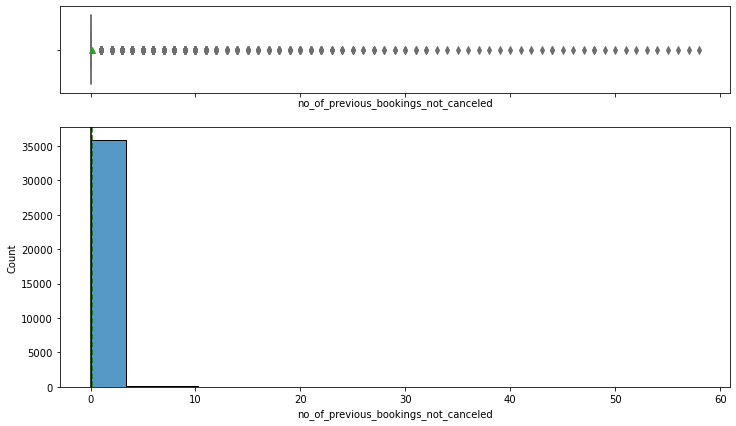

<IPython.core.display.Javascript object>

In [14]:
histogram_boxplot(data, "no_of_previous_bookings_not_canceled")

* The range of number of previous bookings did not cancel is from 0 to slightly over 60 times.
* The distribution is extremely right-skewed.
* There are a fews customers did not cancelled thier previous bookings. 
* There are more than 35,000 bookings has 0 previous bookings that did not cancel.
* The mean and medium are very close, which is around 0 no cancellation. 
* Sugestion that most of bookings are not return customers.
* If they are return customers, they kept the previous bookings more than canceling them.
* However, there is a few return customers.

### Arrival Month

### Q1. What are the busiest months in the hotel?

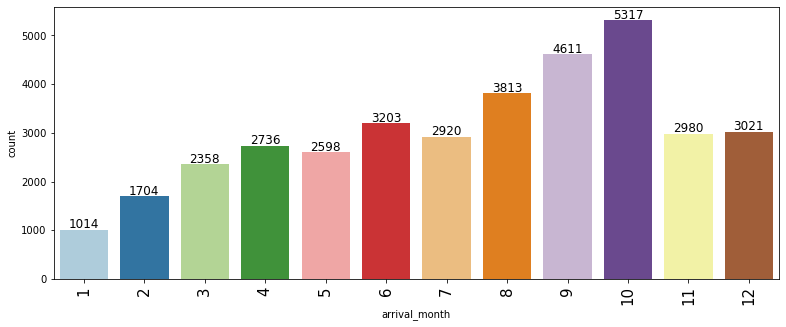

<IPython.core.display.Javascript object>

In [12]:
labeled_barplot(data, "arrival_month")

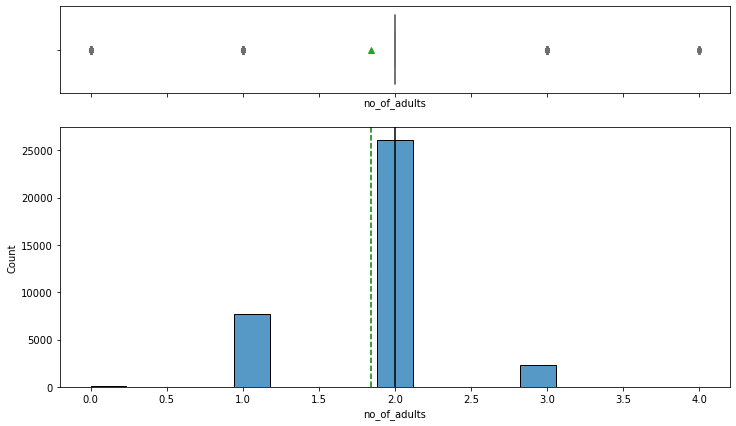

<IPython.core.display.Javascript object>

In [14]:
histogram_boxplot(data, "no_of_adults")

### Number of Adults

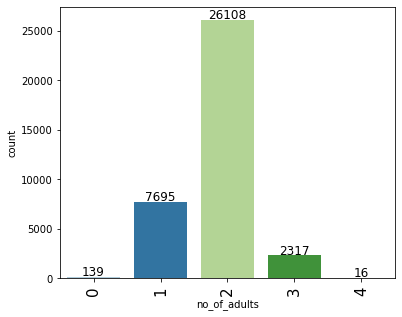

<IPython.core.display.Javascript object>

In [15]:
labeled_barplot(data, "no_of_adults")

### Number of Children

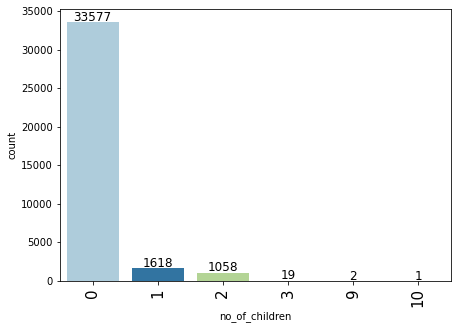

<IPython.core.display.Javascript object>

In [16]:
labeled_barplot(data, "no_of_children")

### Number of Weekday Stay

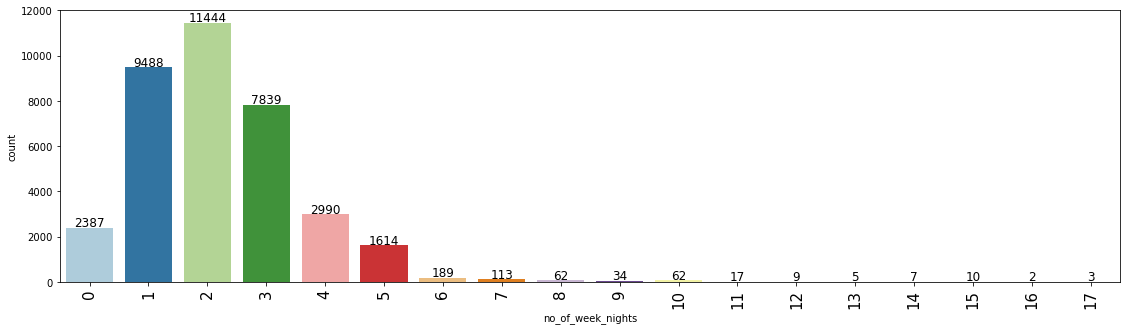

<IPython.core.display.Javascript object>

In [17]:
labeled_barplot(data, "no_of_week_nights")

### Number of Weekend Stay

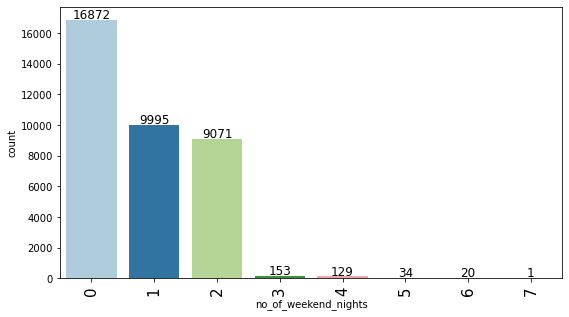

<IPython.core.display.Javascript object>

In [18]:
labeled_barplot(data, "no_of_weekend_nights")

### Arrival Year

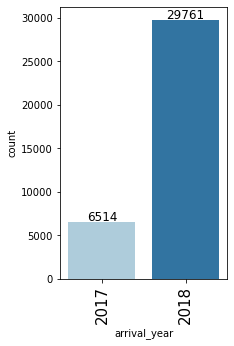

<IPython.core.display.Javascript object>

In [20]:
labeled_barplot(data, "arrival_year")

### Arrival Date

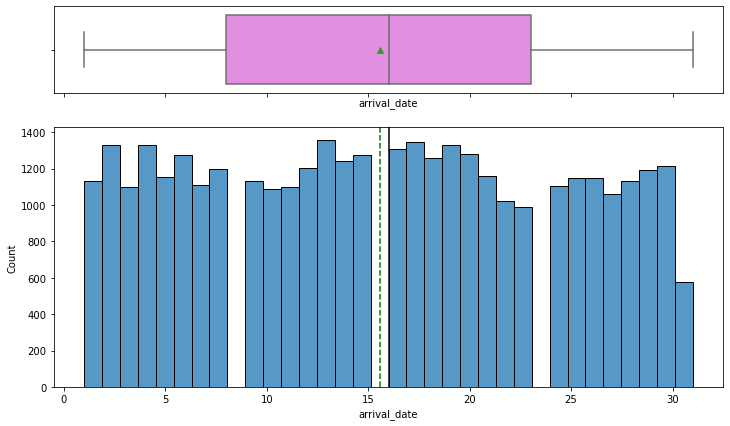

<IPython.core.display.Javascript object>

In [24]:
labeled_barplot(data, "no_of_week_nights")

## Market Segment Type

### Q2. Which market segment do most of the guests come from?

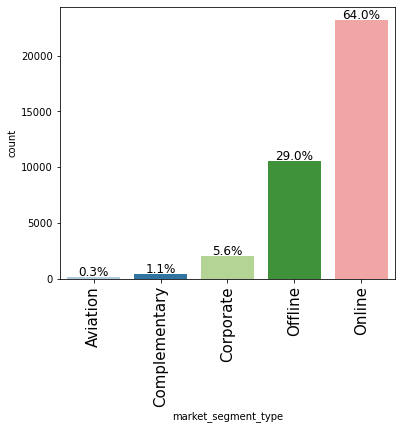

<IPython.core.display.Javascript object>

In [30]:
labeled_barplot(data, "market_segment_type", perc=True)

## Bivariate Analysis

## Q3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?

### Market Segment and Room Type

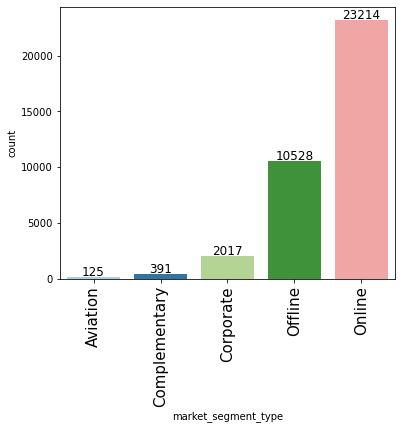

<IPython.core.display.Javascript object>

In [21]:
labeled_barplot(data, "market_segment_type")

## Q4.What percentage of bookings are canceled?

### Booking Status

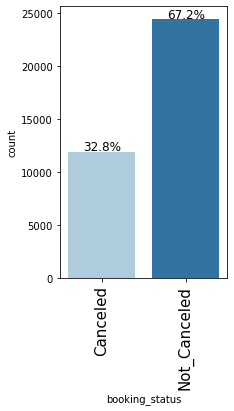

<IPython.core.display.Javascript object>

In [22]:
labeled_barplot(data, "booking_status", perc=True)

* There is 32.8% of booking are cenceled.

## Q4. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?

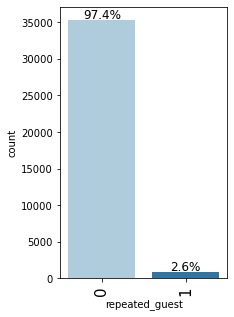

<IPython.core.display.Javascript object>

In [23]:
labeled_barplot(data, "repeated_guest", perc=True)

* There is 97.4% of repeated guests.

## Q6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

### Special Requirements

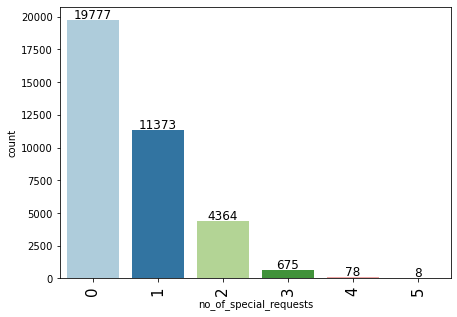

<IPython.core.display.Javascript object>

In [27]:
labeled_barplot(data, "no_of_special_requests")

### Booking Status and No of Special Requests

In [28]:
stacked_barplot(
    data, "booking_status", "no_of_special_requests"
)  ## Complete the code to plot stacked barplot for no of special requests

NameError: name 'stacked_barplot' is not defined

<IPython.core.display.Javascript object>

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled? 
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

### Outliers
* Its upper whisker. is 179.55 dollars. 
* Assigned 179.55 dollars, the upper_whisker value, to outliers greater or equal to 500 dollars.

## EDA

- It is a good idea to explore the data once again after manipulating it.

## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

## Building a Logistic Regression model

## Model performance evaluation

## Final Model Summary

## Building a Decision Tree model

## Do we need to prune the tree?

## Model Performance Comparison and Conclusions

## Actionable Insights and Recommendations

- What profitable policies for cancellations and refunds can the hotel adopt?
- What other recommedations would you suggest to the hotel?